# Домашнее задание к лекции «Корреляция и корреляционный анализ»

Возьмите датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков
Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 11,5
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/Users/sergejgordeev/Desktop/ОБУЧЕНИЕ/2. Phyton/18. Корреляция и корреляционный анализ/water.csv')
df = df[ ['location', 'town', 'hardness', 'mortality'] ]
df

,location,town,hardness,mortality
0,South,Bath,105,1247
1,North,Birkenhead,17,1668
2,South,Birmingham,5,1466
3,North,Blackburn,14,1800
4,North,Blackpool,18,1609
...,...,...,...,...
56,South,Walsall,60,1527
57,South,West Bromwich,53,1627
58,South,West Ham,122,1486
59,South,Wolverhampton,81,1485


### Построить точечный график

<AxesSubplot:title={'center':'Зависимость смертности от жесткости воды'}, xlabel='Жесткость', ylabel='Смертность'>

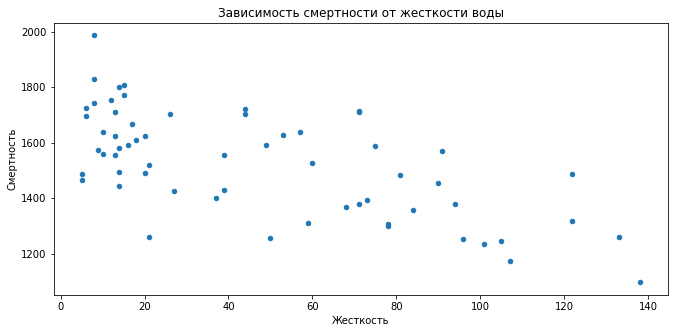

In [26]:
df = df.rename(columns= {'hardness': 'Жесткость', 'mortality': 'Смертность'})
df.plot(kind='scatter', 
        x='Жесткость', 
        y='Смертность', 
        title='Зависимость смертности от жесткости воды')

В точечном графике наблюдается обратная зависимость смертности от жесткости воды.

### Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [29]:
# коэффициент корреляции Пирсона
df[['Жесткость', 'Смертность']].corr()

,Жесткость,Смертность
Жесткость,1.000000,-0.654849
Смертность,-0.654849,1.000000


In [30]:
# коэффициент корреляции Спирмена
df[['Жесткость', 'Смертность']].corr(method='spearman')

,Жесткость,Смертность
Жесткость,1.000000,-0.631665
Смертность,-0.631665,1.000000


### Построить модель линейной регрессии

In [31]:
X = df[['Жесткость']]
y = df['Смертность']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)  # обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [34]:
model.coef_

array([-3.31576799])

In [35]:
model.intercept_

1678.9405326885008

In [36]:
y_pred = model.predict(X_test)
y_pred

array([1330.78489376, 1645.78285279, 1632.51978083, 1533.04674114,
       1420.31062948, 1612.62517289, 1237.94339004, 1430.25793345,
       1609.3094049 , 1659.04592475, 1483.31022129, 1410.36332551,
       1549.62558108, 1632.51978083, 1443.52100541, 1549.62558108])

In [13]:
# сравнение прогноза с фактом
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,hardness,y_pred,y_test
0,105,1330.784894,1247
5,10,1645.782853,1558
46,14,1632.519781,1495
31,44,1533.046741,1702
13,78,1420.310629,1307
55,20,1612.625173,1625
34,133,1237.943390,1259
49,75,1430.257933,1587
12,21,1609.309405,1519
40,6,1659.045925,1696


### Рассчитать коэффициент детерминации

In [14]:
# значение коэффициента детерминации
model.score(X_test, y_test)

0.410213439338294

### Вывести график остатков

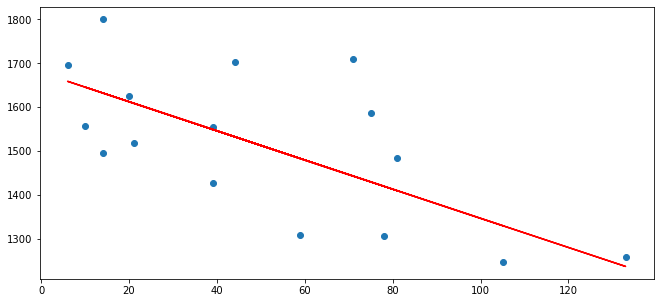

In [37]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

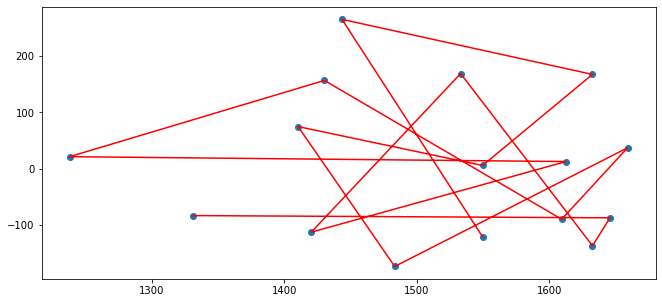

In [38]:
plt.scatter(y_pred, (y_test - y_pred))
plt.plot(y_pred, (y_test - y_pred), c='r')

По визуализации остатков отмечается хаотичность значений, модель не ошибается.Имеется зависимость смертности от жесткости воды.

# Задание 2. ЮГ

In [27]:
south = df[df['location'] == 'South']
south.head()

,location,town,Жесткость,Смертность
0,South,Bath,105,1247
2,South,Birmingham,5,1466
7,South,Bournemouth,78,1299
9,South,Brighton,84,1359
10,South,Bristol,73,1392


<AxesSubplot:title={'center':'Зависимость смертности от жесткости воды(юг)'}, xlabel='Жесткость', ylabel='Смертность'>

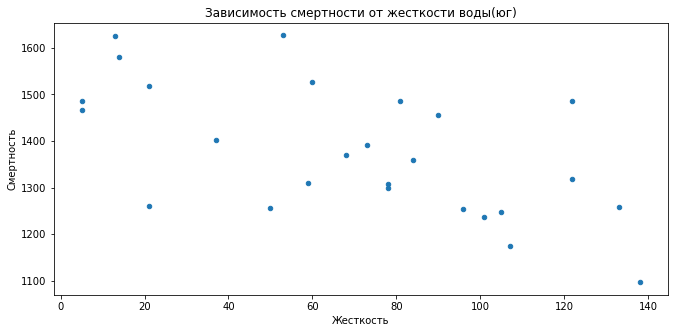

In [28]:
south.plot(kind='scatter', 
        x='Жесткость', 
        y='Смертность', 
        title='Зависимость смертности от жесткости воды(юг)')

Связь есть но распределение менее плотное, чем в данных по всей базе данных. Вероятно проблема нехватки данных.

In [39]:
# коэффициент корреляции Пирсона
south[['Жесткость', 'Смертность']].corr()

,Жесткость,Смертность
Жесткость,1.000000,-0.602153
Смертность,-0.602153,1.000000


In [40]:
# коэффициент корреляции Спирмена
south[['Жесткость', 'Смертность']].corr(method='spearman')

,Жесткость,Смертность
Жесткость,1.000000,-0.595723
Смертность,-0.595723,1.000000


In [41]:
X = south[['Жесткость']]
y = south['Смертность']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)  # обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [45]:
model.coef_

array([-3.12141428])

In [46]:

model.intercept_

1604.2662828795662

In [47]:
y_pred = model.predict(X_test)
y_pred

array([1223.45374102, 1588.65921149, 1276.51778374, 1223.45374102,
       1488.77395461, 1538.71658305, 1420.10284051])

In [48]:
# сравнение прогноза с фактом
res_south = X_test.copy()

res_south['y_pred'] = y_pred
res_south['y_test'] = y_test
res_south

,Жесткость,y_pred,y_test
18,122,1223.453741,1318
38,5,1588.659211,1486
0,105,1276.517784,1247
58,122,1223.453741,1486
27,37,1488.773955,1402
19,21,1538.716583,1260
33,59,1420.102841,1309


### Коэффициент детерминации

In [78]:
model.score(X_test, y_test)

-0.09826474145023711

### График остатков

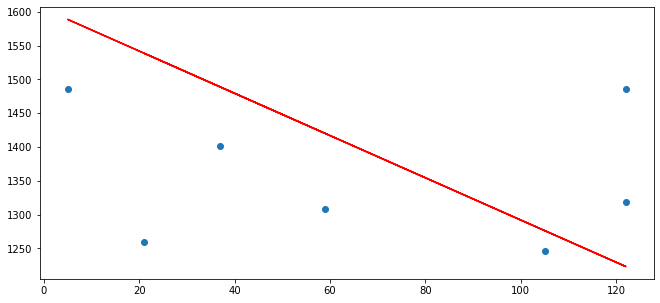

In [50]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

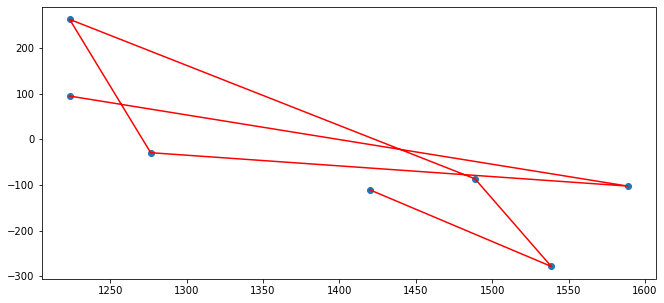

In [51]:
# график остатков
plt.scatter(y_pred, (y_test - y_pred))
plt.plot(y_pred, (y_test - y_pred), c='r')

# Задание 2 Север

In [52]:
north = df[df['location'] == 'North']
north.head()

,location,town,Жесткость,Смертность
1,North,Birkenhead,17,1668
3,North,Blackburn,14,1800
4,North,Blackpool,18,1609
5,North,Bolton,10,1558
6,North,Bootle,15,1807


<AxesSubplot:title={'center':'Зависимость смертности от жесткости воды на севере'}, xlabel='Жесткость', ylabel='Смертность'>

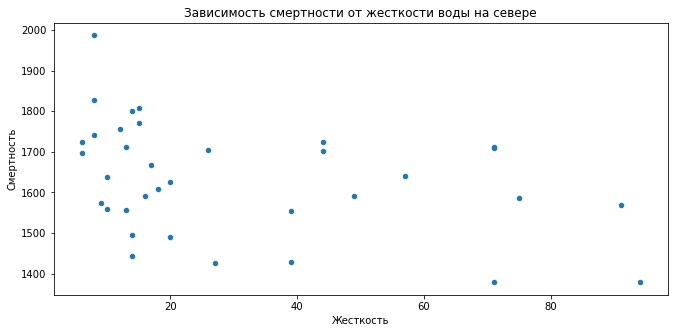

In [64]:
north.plot(kind='scatter', 
        x='Жесткость', 
        y='Смертность', 
        title='Зависимость смертности от жесткости воды на севере')

In [65]:
# коэффициент корреляции Пирсона
north[['Жесткость', 'Смертность']].corr()

,Жесткость,Смертность
Жесткость,1.000000,-0.368598
Смертность,-0.368598,1.000000


In [66]:
# коэффициент корреляции Спирмена
north[['Жесткость', 'Смертность']].corr(method='spearman')

,Жесткость,Смертность
Жесткость,1.000000,-0.404208
Смертность,-0.404208,1.000000


In [68]:
X = north[['Жесткость']]
y = north['Смертность']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [70]:
model = LinearRegression()
model.fit(X_train, y_train)  # обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [71]:
model.coef_

array([-2.14659196])

In [72]:
model.intercept_

1691.0175604303595

In [73]:
y_pred = model.predict(X_test)
y_pred

array([1673.84482478, 1671.69823282, 1660.96527304, 1678.13800869,
       1656.67208912, 1538.60953151, 1596.56751434, 1673.84482478,
       1607.30047412])

In [74]:
# сравнение прогноза с фактом
res_north = X_test.copy()
res_north['y_pred'] = y_pred
res_north['y_test'] = y_test
res_north

,Жесткость,y_pred,y_test
45,8,1673.844825,1987
23,9,1671.698233,1574
43,14,1660.965273,1444
36,6,1678.138009,1724
26,16,1656.672089,1591
50,71,1538.609532,1713
31,44,1596.567514,1702
22,8,1673.844825,1742
16,39,1607.300474,1555


In [75]:
# значение коэффициента детерминации
model.score(X_test, y_test)

-0.09826474145023711

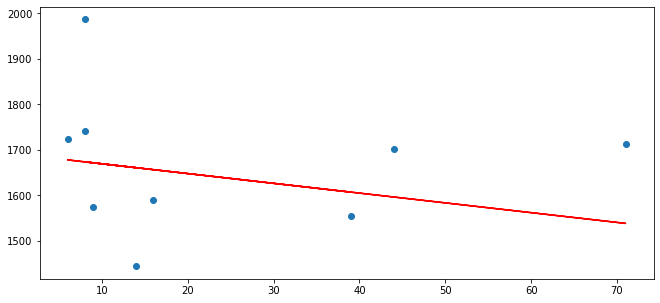

In [76]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

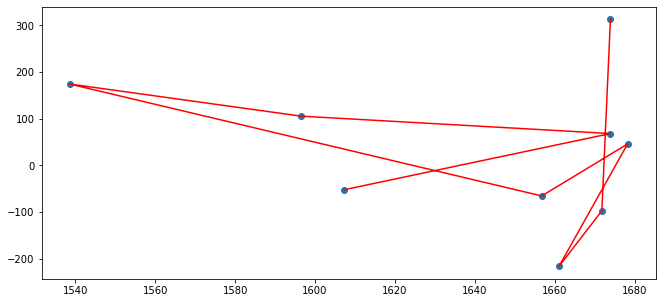

In [77]:
# график остатков
plt.scatter(y_pred, (y_test - y_pred))
plt.plot(y_pred, (y_test - y_pred), c='r')

В разгруппированных данных меньшая плотность распределения величин, хуже коэффициенты. Качество моделей ухудшилось.
В данных по югу меньше плотность распределения по отношению к северу, четкая зависимость не проглядывается. По северу зависимость сохраняется.